In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

pd.options.display.max_columns = 999

# Loading data sample
Here a example flight

In [2]:
flight = pd.read_csv('./example_flight.csv')
flight.head()

,second,track_angle,altitude,groundspeed,on_taxiway
0,6464.0,158.697666,6446.187500,264.644531,0.0
1,6465.0,158.675693,6430.187500,264.000000,0.0
2,6466.0,158.653721,6414.640625,263.644531,0.0
3,6467.0,158.647160,6402.640625,262.644531,0.0
4,6468.0,158.665565,6390.187500,262.000000,0.0


# Illustrating speed and altitude parameters

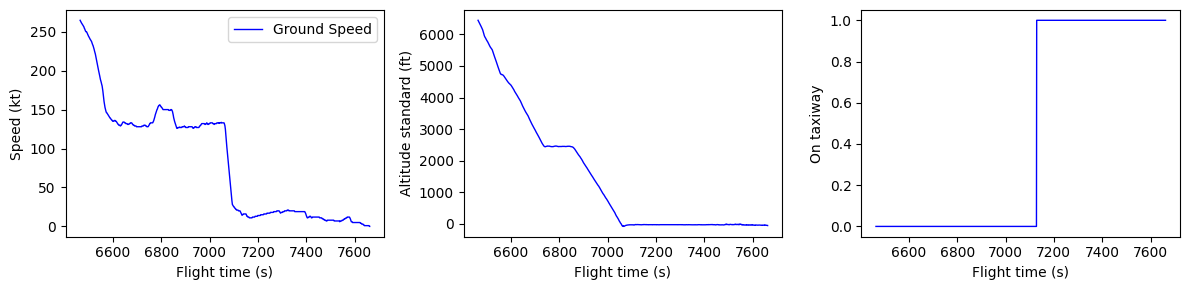

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
ax1.plot(
    flight.second,
    flight.groundspeed,
    color="b",
    lw=1,
    label="Ground Speed",
)

ax1.legend()
ax1.set_xlabel("Flight time (s)")
ax1.set_ylabel("Speed (kt)")

ax2.plot(flight.second, flight.altitude, color="b", lw=1)
ax2.set_xlabel("Flight time (s)")
ax2.set_ylabel("Altitude standard (ft)")

ax3.plot(flight.second, flight.on_taxiway, color="b", lw=1)
ax3.set_xlabel("Flight time (s)")
ax3.set_ylabel("On taxiway")

plt.tight_layout()

# Estimate SET

In [4]:
from DeepEnv import SetEstimator

set_estimator = SetEstimator(
)
real_set_index = 851
proba, estimated_set_index = set_estimator.estimate(
    flight
)

print("Probability of Single Engine Taxiing :",proba)
print("Estimated SET index :", estimated_set_index)
print("Real SET index :", real_set_index)

Probability of Single Engine Taxiing : 0.9990234375
Estimated SET index : 863
Real SET index : 851


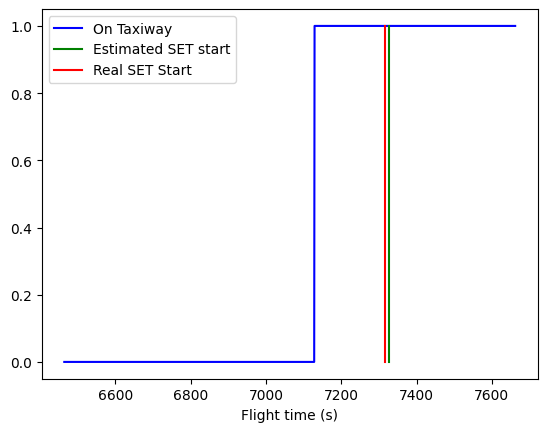

In [6]:
plt.plot(flight.second, flight.on_taxiway,color="b",label="On Taxiway")
plt.plot([flight.second.iloc[estimated_set_index]]*2, [0,1],  color="g", label="Estimated SET start")
plt.plot([flight.second.iloc[real_set_index]]*2, [0,1],  color="r", label="Real SET Start")
plt.xlabel("Flight time (s)")
plt.legend()
plt.show()